In [47]:
import pandas as pd
import geopandas as gpd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
resultados = pd.read_csv("ResultadosElectorales_2023.csv")
circuitos = gpd.read_file("circuitos-electorales.csv")

C:\Users\LEONEL\AppData\Local\Temp\ipykernel_3940\290196362.py:1: DtypeWarning: Columns (7,10,11,20) have mixed types. Specify dtype option on import or set low_memory=False.
  resultados = pd.read_csv("ResultadosElectorales_2023.csv")


In [112]:
#Vamos a crear un filtro con datos de Caba y Presidente.
filtro = resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires") & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE")].reset_index()

#Guardamos en otro DF los votos de cada agrupacion en CABA y agregamos los porcentajes de votos
total = filtro["votos_cantidad"].sum()
dfPartidos = filtro.groupby(["agrupacion_nombre","distrito_nombre"]
    ).agg(porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))
    ).reset_index()

votos_Blanco = filtro[filtro["votos_tipo"] == "EN BLANCO"]
porcentaje_en_blanco = round((votos_Blanco["votos_cantidad"].sum() * 100) / total, 2)

fila_en_blanco = {"agrupacion_nombre": "EN BLANCO", "distrito_nombre": "Ciudad Autónoma de Buenos Aires", "porcentaje": porcentaje_en_blanco}
df_en_blanco = pd.DataFrame([fila_en_blanco])

dfPartidos = pd.concat([dfPartidos, df_en_blanco], ignore_index=True)
dfPartidos






,agrupacion_nombre,distrito_nombre,porcentaje
0,FRENTE DE IZQUIERDA Y DE TRABAJADORES - UNIDAD,Ciudad Autónoma de Buenos Aires,3.46
1,HACEMOS POR NUESTRO PAIS,Ciudad Autónoma de Buenos Aires,3.01
2,JUNTOS POR EL CAMBIO,Ciudad Autónoma de Buenos Aires,40.15
3,LA LIBERTAD AVANZA,Ciudad Autónoma de Buenos Aires,19.33
4,UNION POR LA PATRIA,Ciudad Autónoma de Buenos Aires,31.43
5,EN BLANCO,Ciudad Autónoma de Buenos Aires,1.69


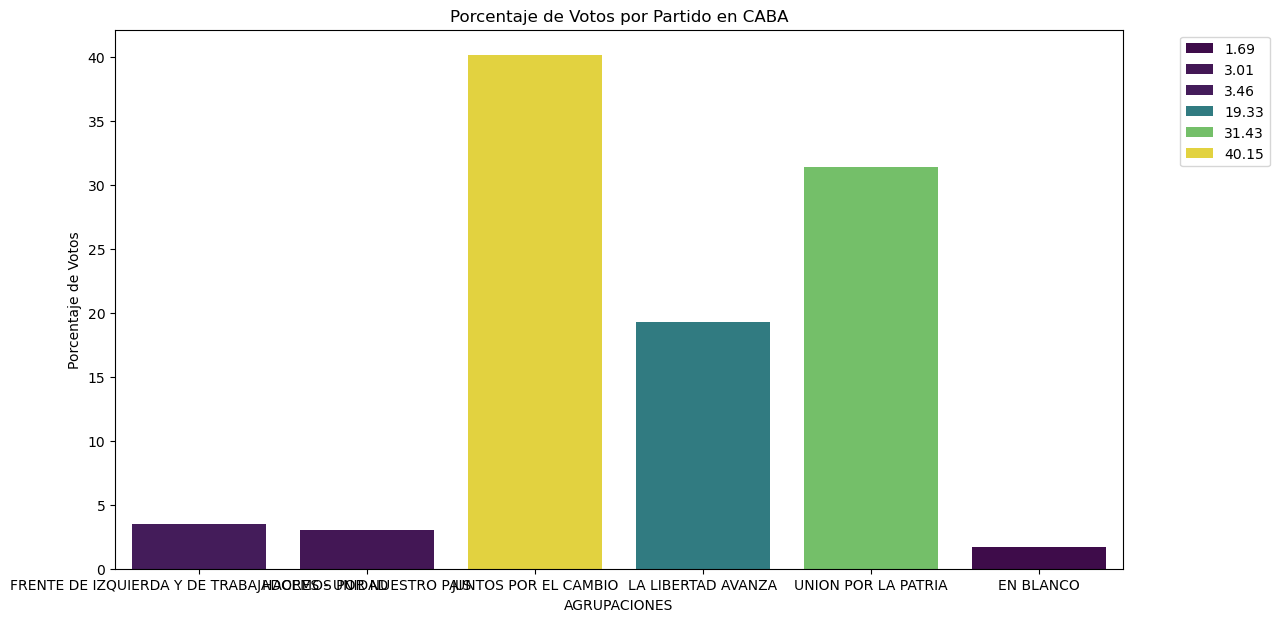

In [114]:
plt.figure(figsize=(13, 7))
sns.barplot(x='agrupacion_nombre', y='porcentaje',data= dfPartidos, hue='porcentaje', palette="viridis")

# reever los nombres, le puse el que me parecio y los valores los saque standar 
plt.legend(title='', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel('AGRUPACIONES')
plt.ylabel('Porcentaje de Votos')
plt.title('Porcentaje de Votos por Partido en CABA')

plt.show()

In [131]:
filtroUxP= resultados[(resultados["distrito_nombre"]== "Ciudad Autónoma de Buenos Aires")
                      & (resultados["cargo_nombre"] == "PRESIDENTE Y VICE") 
                      & (resultados["agrupacion_nombre"] == "UNION POR LA PATRIA")]

filtroUxP.groupby(["seccion_nombre","agrupacion_nombre"]
                 ).agg(votos_total = ("votos_cantidad", "sum"),
                      porcentaje = ("votos_cantidad", lambda x: round((x.sum()*100)/total,2))).reset_index()


,seccion_nombre,agrupacion_nombre,votos_total,porcentaje
0,Comuna 01,UNION POR LA PATRIA,38645,2.02
1,Comuna 02,UNION POR LA PATRIA,19225,1.01
2,Comuna 03,UNION POR LA PATRIA,38993,2.04
3,Comuna 04,UNION POR LA PATRIA,51401,2.69
4,Comuna 05,UNION POR LA PATRIA,42504,2.22
5,Comuna 06,UNION POR LA PATRIA,39230,2.05
6,Comuna 07,UNION POR LA PATRIA,44622,2.33
7,Comuna 08,UNION POR LA PATRIA,43136,2.26
8,Comuna 09,UNION POR LA PATRIA,39233,2.05
9,Comuna 10,UNION POR LA PATRIA,37457,1.96


In [5]:
circuitos

,WKT,ID,CIRCUITO_N,COMUNA,BARRIO,TOTAL,MASCULINO,FEMENINO,PERIMETRO,AREA,geometry
0,MULTIPOLYGON (((-58.3661871461469 -34.62043128...,001,1,1,SAN TELMO,11377.00000000000,5695.00000000000,5682.00000000000,4157.17556283000,709721.55022900004,"MULTIPOLYGON (((-58.36619 -34.62043, -58.36606..."
1,MULTIPOLYGON (((-58.3773566900831 -34.61744732...,002,2,1,SAN TELMO,11365.00000000000,5870.00000000000,5495.00000000000,3045.85873489000,523430.86001399998,"MULTIPOLYGON (((-58.37736 -34.61745, -58.37743..."
2,MULTIPOLYGON (((-58.3572938809189 -34.59510562...,003,3,1,PUERTO MADERO,702.00000000000,416.00000000000,286.00000000000,14439.58562320000,4248032.90197000000,"MULTIPOLYGON (((-58.35729 -34.59511, -58.35723..."
3,MULTIPOLYGON (((-58.3671229141027 -34.61213671...,004,4,1,PUERTO MADERO,489.00000000000,307.00000000000,182.00000000000,8028.11547007000,777372.45509700000,"MULTIPOLYGON (((-58.36712 -34.61214, -58.36762..."
4,MULTIPOLYGON (((-58.3835637305124 -34.57823507...,005,5,1,RETIRO,5275.00000000000,3131.00000000000,2144.00000000000,16401.98147680000,3262096.05041000010,"MULTIPOLYGON (((-58.38356 -34.57824, -58.38328..."
...,...,...,...,...,...,...,...,...,...,...,...
162,MULTIPOLYGON (((-58.4133289404238 -34.64349004...,057,57,4,NUEVA POMPEYA,18768.00000000000,9532.00000000000,9236.00000000000,6341.98611558000,1681075.20221000000,"MULTIPOLYGON (((-58.41333 -34.64349, -58.41254..."
163,MULTIPOLYGON (((-58.4752520574717 -34.66896222...,089,89,8,VILLA LUGANO,46140.00000000000,23699.00000000000,22441.00000000000,10058.06223910000,4524565.79088000020,"MULTIPOLYGON (((-58.47525 -34.66896, -58.47441..."
164,MULTIPOLYGON (((-58.464421436223 -34.660057142...,090,90,8,VILLA LUGANO,42538.00000000000,21474.00000000000,21064.00000000000,10870.01898480000,4771793.77496999970,"MULTIPOLYGON (((-58.46442 -34.66006, -58.46448..."
165,MULTIPOLYGON (((-58.4713146924268 -34.63664464...,112,112,10,FLORESTA,8290.00000000000,3945.00000000000,4345.00000000000,3067.80447799000,542171.08825499995,"MULTIPOLYGON (((-58.47131 -34.63664, -58.47131..."


In [4]:
datosC = circuitos.dtypes
print(datosC)

WKT             object
ID              object
CIRCUITO_N      object
COMUNA          object
BARRIO          object
TOTAL           object
MASCULINO       object
FEMENINO        object
PERIMETRO       object
AREA            object
geometry      geometry
dtype: object
